# Stock Market Analysis using Time Series Prediction

# Introduction about Stock Market Analysis:
Stock market analysis refers to the process of evaluating and interpreting various aspects of financial markets, particularly the stock market, to make informed investment decisions. The primary goal of stock market analysis is to assess the past, present, and potential future performance of stocks or other financial instruments.


# Time series Prediction:
Stock market analysis using time series is a quantitative approach to understanding and predicting stock price movements over time. Time series analysis involves studying historical stock price data to identify patterns, trends, and relationships that can inform investment decisions.

# Objectives of the Project:
1.Data collection: The first step in time series analysis is to collect historical stock price data. This data typically includes daily, weekly, or monthly closing prices of a particular stock or index. You can obtain this data from various sources, including financial news websites, stock exchanges, or specialized data providers.

2.Data Preprocessing: Before analysis, we may need to clean and preprocess the data. This involves handling missing values, removing outliers, and ensuring that the data is in a consistent format.

3.Data Visualization: Visualizing the time series data is essential to gain insights into its behavior. 

4.Tesla Stock Market Analyis

5.Tesla ARIMA (AutoRegressive Integrated Moving Average) Time Series Prediction



# Import the Libraries:


In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the Data

In [2]:
tesla =pd.read_csv("C:\\Users\\revat\\Downloads\\Tesla Data.csv")

     

In [3]:
print(tesla)

            Date        Open        High         Low       Close   Adj Close  \
0     30-06-2010    1.719333    2.028000    1.553333    1.588667    1.588667   
1     01-07-2010    1.666667    1.728000    1.351333    1.464000    1.464000   
2     02-07-2010    1.533333    1.540000    1.247333    1.280000    1.280000   
3     06-07-2010    1.333333    1.333333    1.055333    1.074000    1.074000   
4     07-07-2010    1.093333    1.108667    0.998667    1.053333    1.053333   
...          ...         ...         ...         ...         ...         ...   
3072  13-09-2022  292.899994  297.399994  290.399994  292.130005  292.130005   
3073  14-09-2022  292.239990  306.000000  291.640015  302.609985  302.609985   
3074  15-09-2022  301.829987  309.119995  300.720001  303.750000  303.750000   
3075  16-09-2022  299.609985  303.709991  295.600006  303.350006  303.350006   
3076  19-09-2022  300.089996  309.839996  297.799988  309.070007  309.070007   

         Volume  
0     257806500  
1  

In [4]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-06-2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,01-07-2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,02-07-2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,06-07-2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,07-07-2010,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [5]:
tesla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3072,13-09-2022,292.899994,297.399994,290.399994,292.130005,292.130005,68229600
3073,14-09-2022,292.239990,306.000000,291.640015,302.609985,302.609985,72628700
3074,15-09-2022,301.829987,309.119995,300.720001,303.750000,303.750000,64795500
3075,16-09-2022,299.609985,303.709991,295.600006,303.350006,303.350006,86949500
3076,19-09-2022,300.089996,309.839996,297.799988,309.070007,309.070007,60060200


# Information about Tesla stocks:

In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3077 non-null   object 
 1   Open       3077 non-null   float64
 2   High       3077 non-null   float64
 3   Low        3077 non-null   float64
 4   Close      3077 non-null   float64
 5   Adj Close  3077 non-null   float64
 6   Volume     3077 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 168.4+ KB


# Descriptive Statistics:
Here we have to calculate basic statistics such as mean, median, standard deviation, and skewness to describe the central tendency and variability of the stock prices.

In [7]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3.077000e+03
mean,55.502174,56.748047,54.161176,55.495537,55.495537,9.340392e+07
std,93.913081,96.085026,91.517219,93.851345,93.851345,8.235816e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,8.192667,8.354667,7.970667,8.113333,8.113333,4.144350e+07
50%,15.983333,16.242001,15.687333,16.000668,16.000668,7.541550e+07
75%,23.586666,23.916668,23.229334,23.523333,23.523333,1.173030e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [8]:
print(tesla.head())
print(tesla.shape)
print(tesla.columns)

         Date      Open      High       Low     Close  Adj Close     Volume
0  30-06-2010  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
1  01-07-2010  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2  02-07-2010  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
3  06-07-2010  1.333333  1.333333  1.055333  1.074000   1.074000  103003500
4  07-07-2010  1.093333  1.108667  0.998667  1.053333   1.053333  103825500
(3077, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [9]:
print(tesla.shape)

(3077, 7)


In [10]:
print(tesla.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [11]:
tesla.isnull().sum()
#There is no null value in Data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Plot the Graph

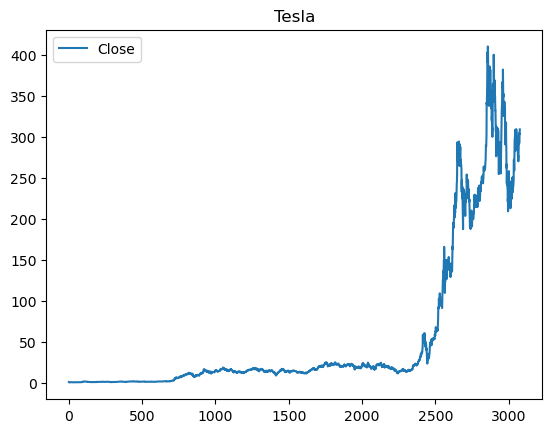

In [12]:
tesla[['Close']].plot()
plt.title("Tesla")
plt.show()

>The x-axis likely represents time, with each point corresponding to a specific date or time period. 
>The y-axis represents the closing prices of Tesla's stock. Each point on the line corresponds to the closing price of Tesla's stock on a specific date.
>The line itself connects the closing prices over time, showing the general trend in Tesla's stock price. 
>The plot can provide insights into the historical performance of Tesla's stock. 

Text(0.5, 1.0, 'Tesla Cumulative Returns')

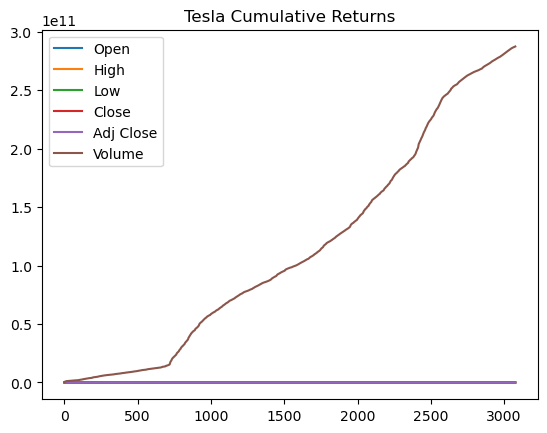

In [13]:
df = tesla.cumsum()
df.plot()
plt.title('Tesla Cumulative Returns')

>Here we calculate the cummulative sum of the Tesla Stock Data.
>We plot the the graph for calculating cummulative sum, the plot will show the cumulative values over time. The x-axis represents the index of the DataFrame and the y-axis represents the cumulative sum of the values.
>With the title 'Tesla Cummulative Returns'.
>The upword slope indicates the positive return of the data. A rising cumulative return indicates that the investment has been profitable.

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

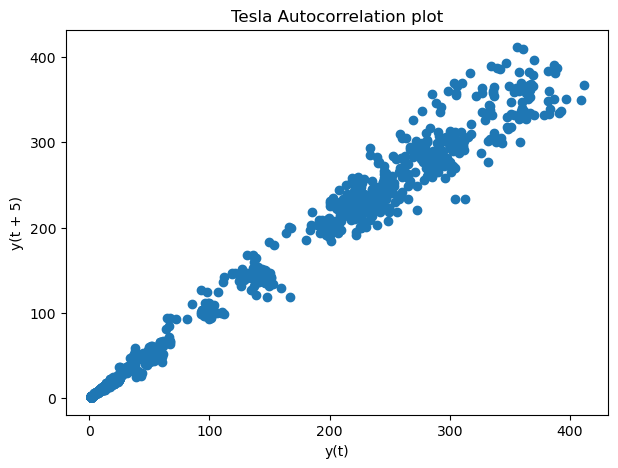

In [40]:
plt.figure(figsize=(7,5))
lag_plot(tesla['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

# What is lag plot?
The lag_plot function is typically used to visualize autocorrelation, which is a measure of how a time series is correlated with itself at different time lags.The lag plot is a useful tool for identifying patterns and dependencies in time series data. 

>The above graph 'Tesla Autocorelation Plot' explain about a lag plot, also known as an autocorrelation plot, for the 'Open' prices of Tesla stock.
>The x-axis of the lag plot represents the 'Open' prices of Tesla stock at time t, and the y-axis represents the 'Open' prices of Tesla stock at time t+5.
>Points above the diagonal line suggest positive autocorrelation, meaning that if the price at time t is high, the price at time t+5 is also likely to be high (and vice versa).
>Points below the diagonal line suggest negative autocorrelation, meaning that if the price at time t is high, the price at time t+5 is likely to be low (and vice versa).
>If the points are scattered around the diagonal line with no clear pattern, it suggests little or no autocorrelation.

In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

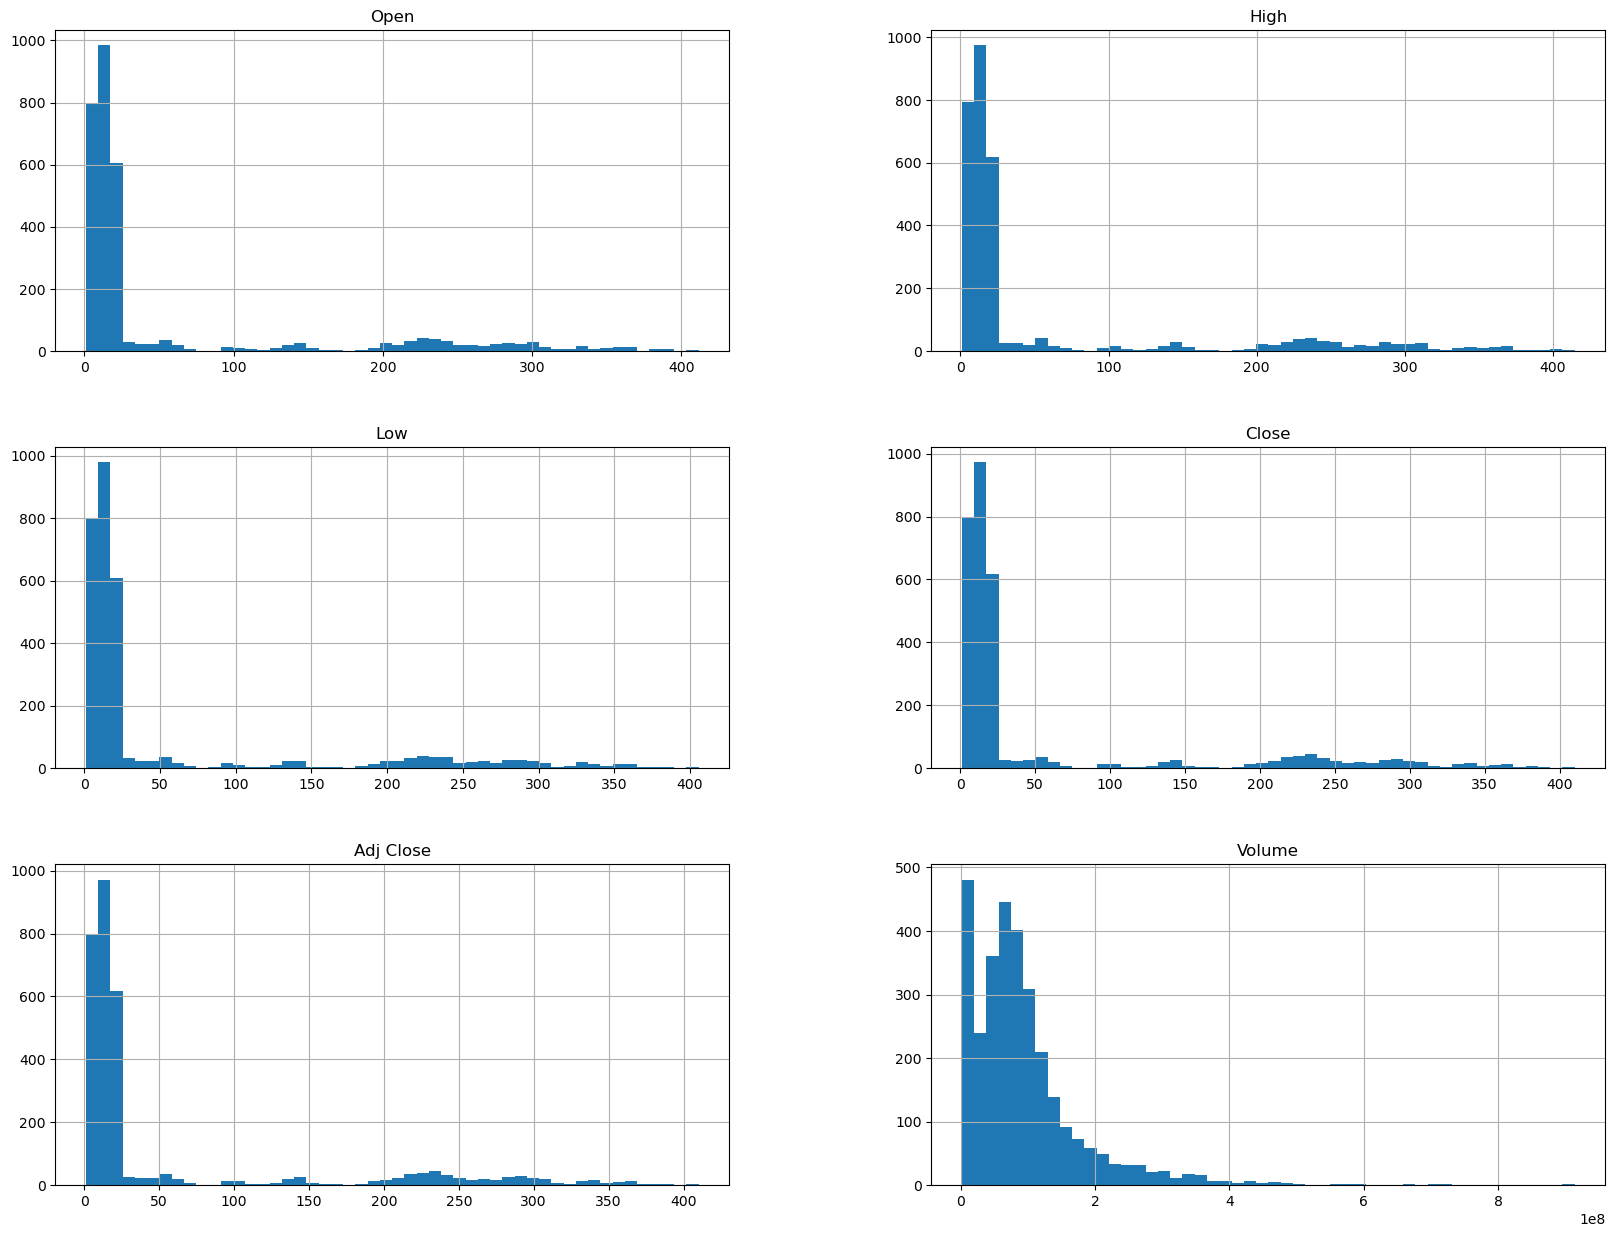

In [42]:
tesla.hist(bins = 50, figsize =(20,15))

>Histograms are useful for visualizing the distribution of data, identifying patterns, and understanding the central tendency (mean, median) and spread (variance, standard deviation) of the data.

>Here we draw h histogram for each of data like 'open', 'high', 'low', 'close', 'adj close', and 'volume'. 
>The x-axis of each histogram subplot represents the range of values, and the y-axis represents the frequency or count of data points that fall within each bin or interval.
>Here only 'Volume' spread the higher variability by comparing to the other data set.

# Splitting the Data into Training and Testing data set

In [18]:
train_data = tesla[0:int(len(df)*0.8)]
test_data =  tesla[int(len(df)*0.8):]

# Fit the Model:
Once you have a better understanding of the data, you can start building time series models.

Here we fit the ARIMA model of the Time series Analysis.

# What is ARIMA Model?
ARIMA (AutoRegressive Integrated Moving Average):
    ARIMA  model to time series data involves several steps. ARIMA models are used for modeling and forecasting time series data by capturing its autocorrelation and seasonality. They consist of three components: 
       
        1.Auto-Regressive (AR)
        
        2.Integrated (I) and 
        
        3.Moving Average (MA).

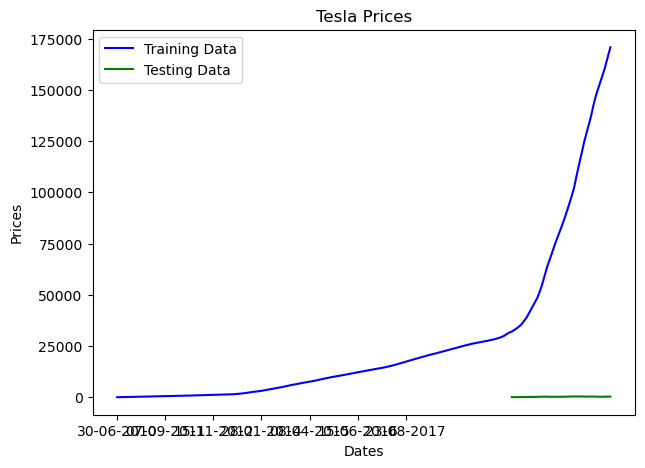

In [19]:
plt.figure(figsize=(7,5))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), tesla['Date'][0:1857:300])
plt.legend()

> The above graph of 'Tesla Prices' is creating a line plot to visualize the training and testing data for Tesla stock prices over time.
> Here  "Dates" is labeled on the x-axis, and "Prices" is labeled on the y-axis.
> The Dataframe in 'Blue' line indicating the training data and the dataframe in 'Green' line indicating the testing data.
>The blue line shows the historical trends captured in the training data, while the green line represents the continuation of those trends into the testing data.
> Here green line closely follows the trend of the blue line in the testing data, it say that the model has captured the underlying patterns and trends effectively.

In [20]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [21]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# ARIMA Model:
ARIMA model on historical time series data, makes one-step ahead forecasts for a test period, calculates both Mean Squared Error (MSE) and Symmetric Mean Absolute Percentage Error (SMAPE) to evaluate the model's performance, and stores the predictions in the predictions list.

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 101.549
Symmetric mean absolute percentage error: 3.250


>The above line provided appears to be implementing a time series forecasting model using the ARIMA (AutoRegressive Integrated Moving Average) method to make predictions and evaluate the model's performance.
>A new ARIMA model is created using the historical data in history. The order parameter (5, 1, 0) specifies the order of the ARIMA model, which consists of the number of autoregressive (AR) terms, differencing (I) terms, and moving average (MA) terms, respectively.

>After making predictions for all time steps in the test set, the code calculates the Mean Squared Error (MSE) between the actual test values and the predicted values (predictions).Here we calculate the Testing Mean Squared error is 101.549.
>MSE is a common metric used to measure the accuracy of regression models.
>MSE measures the average squared difference between the predicted values and the actual values in the test dataset.
>In this case, an MSE of 101.549 suggests that, on average, the squared difference between the model's predictions and the actual values in the test dataset is approximately 101.549 .

>Here smape_kun is used to calculate the Symmetric Mean Absolute Percentage Error (SMAPE) between the actual test values and the predicted values. SMAPE is another metric used to evaluate the accuracy of time series forecasts, and it measures the percentage difference between the actual and predicted values.
>Here Symmetric Mean Absolute Percentage Error (SMAPE) is 3.250 .
>In this case, an SMAPE of 3.25%  is that, on average, the model's predictions have an absolute percentage error of approximately 3.25% when compared to the actual values in the test dataset.

>The Mean Squared Error (MSE) of 101.549 indicates that there is a moderate amount of variance between the model's predictions and the actual values. Lower MSE values would indicate better predictive accuracy.

>The Symmetric Mean Absolute Percentage Error (SMAPE) of 3.25% indicates that, on average, the model's predictions have a relatively small percentage error when compared to the actual values. However, the acceptability of this error rate depends on the specific context and requirements of the forecasting task.

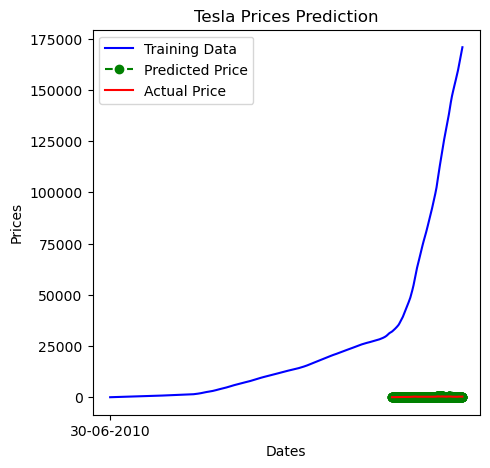

In [39]:
plt.figure(figsize=(5,5))
plt.plot(df['Open'], color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,185, 300), df['Date'][0:185:300])
plt.legend()

>The above plotted graph indicates that a plot to visualize the predictions made by ARIMA time series forecasting model compared to the actual prices of Tesla stock (or any other financial asset) over time.
>Here "Dates" is labeled on the x-axis, and "Prices" is labeled on the y-axis. The Dataframe in 'Blue' line indicating the training data and the dataframe in 'Green' line indicating the predicted price and 'red' line indicates a actual value.These value represent the true values for the test period, which were not seen by the model during training.
>This plotted graph allows you to visually compare the predicted prices (in green) generated by your ARIMA model to the actual prices (in red) over time.

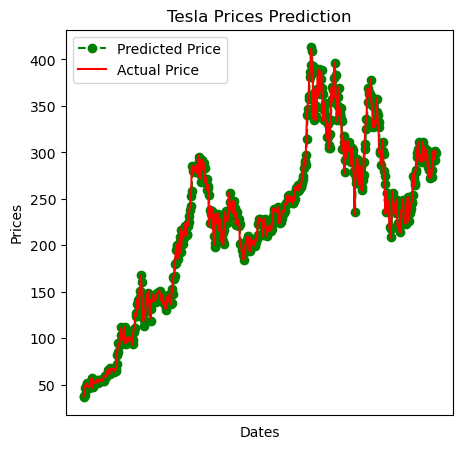

In [35]:
plt.figure(figsize=(5,5))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(145,185, 60), df['Date'][145:185:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

>Here "Dates" is labeled on the x-axis, and "Prices" is labeled on the y-axis. The 'Green' line indicating the predicted price and 'red' line indicates a actual value price.
>In the above graph, this graph allows us to visually compare the predicted prices (in green) generated by our ARIMA model to the actual prices (in red) over a specific time period. The x-axis shows dates, and the y-axis represents prices. The legend helps clarify which line corresponds to which set of data.
>From the above graph we can say that,our fitted ARIMA model is doing a good job of capturing the underlying patterns and trends in the stock prices.

# Limitations:

#Market Volatility and Uncertainty:

Financial markets, including the stock market analysis are inherently volatile and influenced by a multitude of unpredictable factors. Time series prediction models may struggle to account for sudden and unexpected market shifts.

#Data Quality and Integrity:

Data used for analysis may contain errors, missing values, or inconsistencies. Poor data quality can lead to inaccurate predictions and unreliable conclusions.

#Model Assumptions:

ARIMA and similar models have assumptions that may not hold in all cases. For instance, ARIMA assumes linearity and may not capture complex nonlinear relationships in financial data.

# Conclusion:
A "Stock Market Analysis using Time Series Prediction" project typically involves using time series forecasting techniques to predict future stock prices or returns based on historical data.
Assess the predictive accuracy of the time series forecasting models used in the project, such as ARIMA model. This involves calculating evaluation metrics like Mean Squared Error (MSE) and Symmetric Mean Absolute Percentage Error (SMAPE). The lower these metrics, the better the model's performance.
Here we use the ARIMA(AutoRegressive Integrated Moving Average) time series forecasting model for analyze and predict the data.
And the model fitted best and time series forecasting models work best for the specific stock. 
Here we test our forecasting model by plotting graphs. And split our data into training data and testing data.

Here we calculate Mean Squared Error(MSE) and Symmetric Mean Absolute Percentage Error (SMAPE). The Mean Squared Error (MSE) of 101.549 indicates that there is a moderate amount of variance between the model's predictions and the actual values.And The Symmetric Mean Absolute Percentage Error (SMAPE) of 3.25% indicates that, on average, the model's predictions have a relatively small percentage error when compared to the actual values.


A Stock Market Analysis project using time series prediction is a valuable endeavor for understanding and potentially profiting from stock market movements.

